In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns

In [2]:
from collections import Counter
import itertools
from subprocess import check_output

In [3]:
%matplotlib inline

In [4]:
#loading the dataset
df = pd.read_csv(r"C:\Users\megha\anaconda3\train.csv")
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
label_cnt = Counter(df['label']) # checking if the data is balanced or skewed
label_cnt

Counter({1: 4684,
         0: 4132,
         4: 4072,
         7: 4401,
         3: 4351,
         5: 3795,
         8: 4063,
         9: 4188,
         2: 4177,
         6: 4137})

<AxesSubplot:xlabel='label', ylabel='count'>

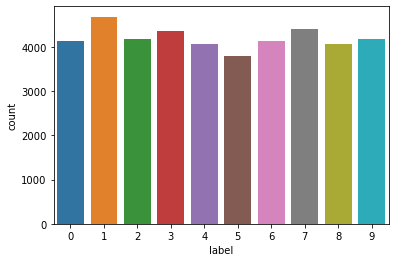

In [6]:
sns.countplot(x='label',data=df) # to check if the classes are balanced

In [7]:
#loading the test dataset
df2= pd.read_csv(r"C:\Users\megha\anaconda3\test.csv")
print(df2.shape)
df2.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = df.drop('label',axis=1).values.astype('float32') # casting will be useful in normalising later on
y = df['label'].values.astype('int32')
X_test = df2.values.astype('float32')

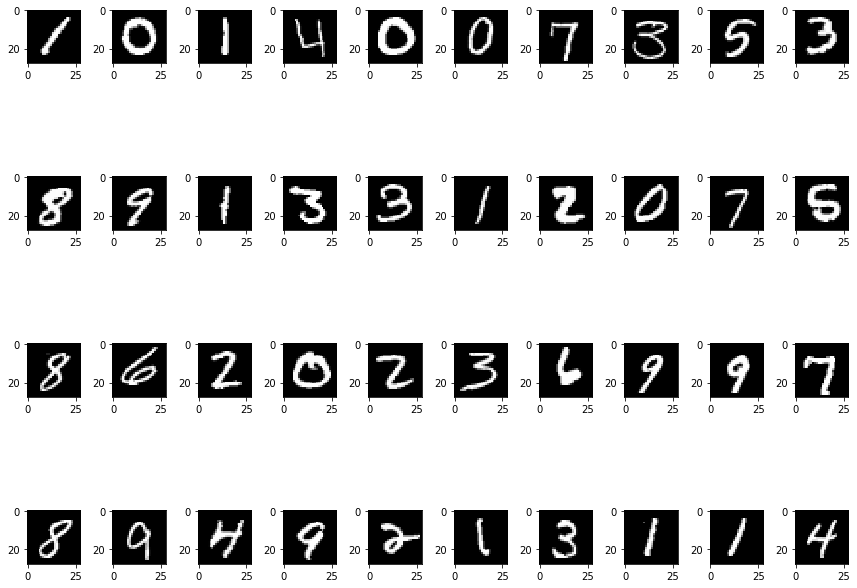

In [9]:
plt.figure(figsize=(12,10))
itr1, itr2 = 10, 4
for i in range(40):  
    plt.subplot(itr2, itr1, i+1)
    plt.imshow(X[i].reshape((28,28)),interpolation='nearest',cmap='gray')
plt.tight_layout()
plt.show()

In [10]:
train_samples = len(X)
print("{} training samples".format(train_samples))
test_samples = len(X_test)
print("{} test samples".format(test_samples))

42000 training samples
28000 test samples


In [11]:
X = X/255.0  # scaling the pixel values between 0 and 1
X_test = X_test/255.0

In [12]:
X = X.reshape(X.shape[0], 28, 28,1) # reshaping each image sample into (width * height * channels) dimension size
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
batch_size = 64
num_classes = 10
epochs = 20
input_shape = (28, 28, 1)

In [14]:
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [15]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size = 0.1, random_state=42)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) # min_lr = lower bound on the learning rate
                                                           # factor =  factor by which the learning rate will be reduced.

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15, # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [19]:
datagen.fit(X_train)
data_generator = datagen.flow(X_train,Y_train, batch_size=batch_size);
h = model.fit(data_generator,
              epochs = epochs, validation_data = (X_val,Y_val),
              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
              , callbacks=[learning_rate_reduction]) # // -> floor division 

Epoch 1/20
590/590 [==============================] - 117s 165ms/step - loss: 0.6627 - accuracy: 0.7836 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 2/20
590/590 [==============================] - 98s 165ms/step - loss: 0.1147 - accuracy: 0.9642 - val_loss: 0.0455 - val_accuracy: 0.9867
Epoch 3/20
590/590 [==============================] - 93s 157ms/step - loss: 0.0869 - accuracy: 0.9737 - val_loss: 0.0351 - val_accuracy: 0.9886
Epoch 4/20
590/590 [==============================] - 91s 155ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0267 - val_accuracy: 0.9910
Epoch 5/20
590/590 [==============================] - 90s 152ms/step - loss: 0.0675 - accuracy: 0.9798 - val_loss: 0.0271 - val_accuracy: 0.9912
Epoch 6/20
590/590 [==============================] - 86s 146ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.0240 - val_accuracy: 0.9931
Epoch 7/20
590/590 [==============================] - 81s 137ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0261 - val_a

In [20]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.014501, final accuracy: 0.995476


In [21]:
Y_pred = model.predict(X_val)

In [22]:
Y_pred

array([[1.2998067e-06, 3.6742588e-08, 4.3229673e-05, ..., 2.3685645e-07,
        9.9994481e-01, 7.9824067e-06],
       [2.2666754e-07, 9.9999750e-01, 2.3847855e-08, ..., 7.2614597e-07,
        6.4383748e-10, 1.3682870e-08],
       [1.0906109e-08, 6.9762190e-10, 5.4007770e-10, ..., 3.9725311e-08,
        1.3617856e-09, 9.9999964e-01],
       ...,
       [7.1214464e-07, 5.3790779e-07, 9.6502787e-05, ..., 9.9983847e-01,
        7.7205577e-08, 5.6180734e-06],
       [7.7470363e-10, 1.6861473e-10, 5.6392828e-08, ..., 9.9999988e-01,
        1.2618347e-11, 1.8489819e-08],
       [1.2499489e-11, 2.4299633e-12, 7.5933167e-13, ..., 3.2151758e-13,
        2.7389921e-10, 2.7562141e-09]], dtype=float32)

In [23]:
predictions = np.argmax(model.predict(X_val), axis=-1)

In [24]:
predictions

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

In [25]:
Y_true = np.argmax(Y_val, axis = 1) 
Y_true

array([8, 1, 9, ..., 7, 7, 5], dtype=int64)

Text(0.5, 69.0, 'Predicted label')

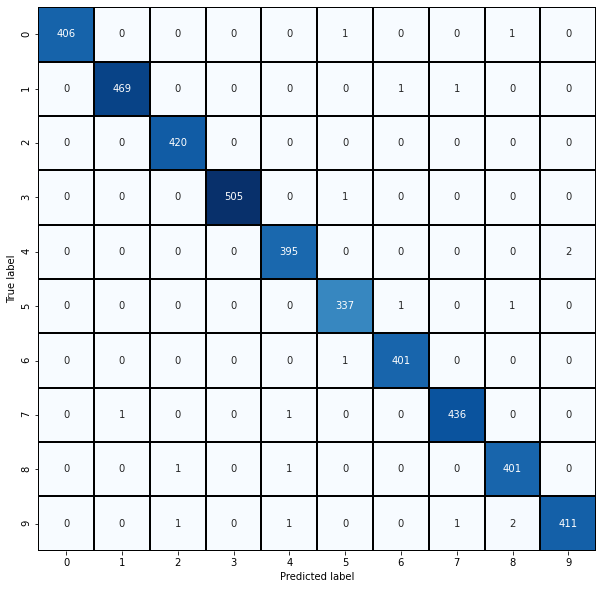

In [26]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(Y_true,predictions),cmap='Blues',annot=True,fmt='g',linecolor='black',linewidth=1,cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [27]:
eval = pd.DataFrame(h.history)
eval

,loss,accuracy,val_loss,val_accuracy,lr
0,0.331358,0.893179,0.047008,0.985476,0.00100
1,0.106933,0.967829,0.045499,0.986667,0.00100
2,0.081050,0.975064,0.035058,0.988571,0.00100
3,0.067339,0.979304,0.026673,0.990952,0.00100
4,0.062512,0.981318,0.027141,0.991190,0.00100
5,0.053938,0.983438,0.024016,0.993095,0.00100
6,0.052900,0.983517,0.026067,0.991905,0.00100
7,0.051120,0.984975,0.020912,0.993571,0.00100
8,0.049545,0.985054,0.023505,0.991905,0.00100
9,0.045604,0.986114,0.017934,0.995000,0.00100


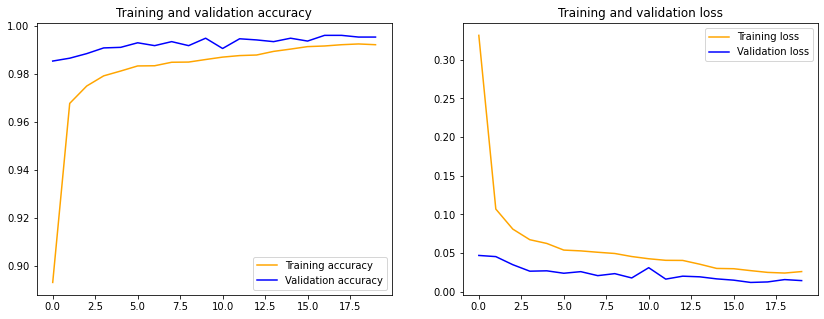

In [28]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(14,5))
axes[0].plot(eval['accuracy'], 'orange', label='Training accuracy')
axes[0].plot(eval['val_accuracy'], 'b', label='Validation accuracy')
axes[0].set_title('Training and validation accuracy')
axes[0].legend()
axes[1].plot(eval['loss'], 'orange', label='Training loss')
axes[1].plot(eval['val_loss'], 'b', label='Validation loss')
axes[1].set_title('Training and validation loss')
axes[1].legend()

In [29]:
errors = predictions - Y_true != 0
errors

array([False, False, False, ..., False, False, False])

In [30]:
pred_errors = predictions[errors]

In [31]:
Y_errors = Y_true[errors]

In [32]:
X_errors = X_val[errors]

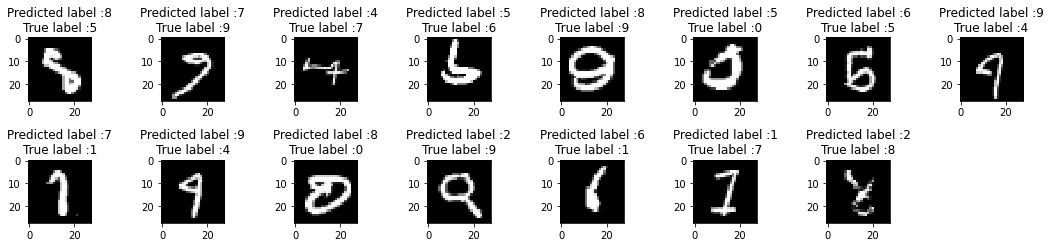

In [35]:
plt.figure(figsize=(15,5))
itr1, itr2 = 8, 3
for i in range(15):  
    plt.subplot(itr2, itr1, i+1)
    plt.imshow(X_errors[i],interpolation='nearest',cmap='gray')
    plt.title("Predicted label :{}\nTrue label :{}".format(pred_errors[i],Y_errors[i]))
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(Y_true, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       408
     Class 1       1.00      1.00      1.00       471
     Class 2       1.00      1.00      1.00       420
     Class 3       1.00      1.00      1.00       506
     Class 4       0.99      0.99      0.99       397
     Class 5       0.99      0.99      0.99       339
     Class 6       1.00      1.00      1.00       402
     Class 7       1.00      1.00      1.00       438
     Class 8       0.99      1.00      0.99       403
     Class 9       1.00      0.99      0.99       416

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



In [37]:
model.save('final_model.h5')

In [38]:
json_string = model.to_json()